In [3]:
'''
prob: tìm mối tương quan giữa thời gian ôn thi và 
    xác suất sinh viên qua môn
data: 20 obs

input: hours
output: pass (0 or 1)
method: logistic regression
'''

'\nprob: tìm mối tương quan giữa thời gian ôn thi và \n    xác suất sinh viên qua môn\ndata: 20 obs\n\ninput: hours\noutput: pass (0 or 1)\nmethod: logistic regression\n'

##### xây dựng công thức = numpy

In [4]:
from __future__ import division, print_function, unicode_literals
import numpy as np
import matplotlib.pyplot as plt

khởi tạo dữ liệu

In [5]:
np.random.seed(2)

# X = hours of revision, y = labels (0 = failed/1 = passed) 
X = np.array([[0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50,
2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]])
y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

# extended data by adding a column of 1s (x_0 = 1)
X = np.concatenate((np.ones((1, X.shape[1])), X), axis = 0)
X

array([[1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
        1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ],
       [0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 1.75, 2.  , 2.25, 2.5 , 2.75,
        3.  , 3.25, 3.5 , 4.  , 4.25, 4.5 , 4.75, 5.  , 5.5 ]])

In [6]:
X.shape

(2, 20)

visualize

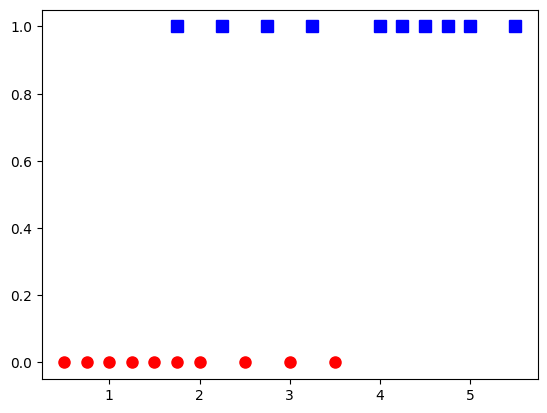

In [7]:
X0 = X[1, np.where(y == 0)][0]
y0 = y[np.where(y == 0)]
X1 = X[1, np.where(y == 1)][0]
y1 = y[np.where(y == 1)]

plt.plot(X0, y0, 'ro', markersize = 8)
plt.plot(X1, y1, 'bs', markersize = 8)
plt.show()

xây dựng các hàm sigmoid, hàm hồi quy

In [8]:
def sigmoid(s):
    return 1/(1 + np.exp(-s))

def logistic_sigmoid_regression(X, y, w_init, eta, tol = 1e-4, max_count = 10000):
# method to calculate model logistic regression by Stochastic Gradient Descent method
# eta: learning rate; tol: tolerance; max_count: maximum iterates
    w = [w_init]
    it = 0
    N = X.shape[1]
    d = X.shape[0]
    count = 0
    check_w_after = 20
# loop of stochastic gradient descent
    while count < max_count:
        # shuffle the order of data (for stochastic gradient descent)
        # and put into mix_id
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[:, i].reshape(d, 1)
            yi = y[i]
            zi = sigmoid(np.dot(w[-1].T, xi)) # zi = h_theta(x) = g(theta^T * c)
            w_new = w[-1] + eta*(yi - zi)*xi
            count += 1
            # stopping criteria
            if count%check_w_after == 0:
                if np.linalg.norm(w_new - w[-check_w_after]) < tol:
                    return w
            w.append(w_new)
    return w

gọi tới phương thức, tính toán

In [9]:
# print out coefficients
eta = .05
d = X.shape[0]
w_init = np.random.randn(d, 1)

w = logistic_sigmoid_regression(X, y, w_init, eta)
print(w[-1])

[[-4.092695  ]
 [ 1.55277242]]


In [10]:
# print out the probability of class 1
print(sigmoid(np.dot(w[-1].T, X)))

[[0.03501592 0.05078108 0.07310642 0.10416972 0.14634799 0.20175793
  0.20175793 0.27147534 0.35458234 0.4475032  0.54424128 0.63775242
  0.72188183 0.79282004 0.89267823 0.92460236 0.94758783 0.96384008
  0.97518471 0.9884283 ]]


visualize kết quả

ValueError: x and y must have same first dimension, but have shapes (1, 10) and (10,)

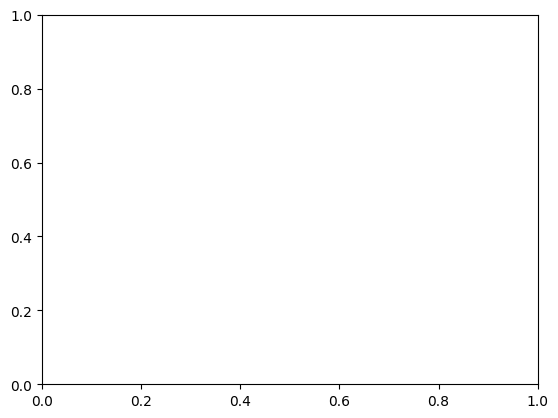

In [23]:
X0 = X[1, np.where(y == 0)][0]
y0 = y[np.where(y == 0)]
X1 = X[1, np.where(y == 1)][0]
y1 = y[np.where(y == 1)]

plt.plot(X0, y0, 'ro', markersize = 8)
plt.plot(X1, y1, 'bs', markersize = 8)

xx = np.linspace(0, 6, 1000)
w0 = w[-1][0][0]  # w[-1] = the latest updated coeffiecients
w1 = w[-1][1][0]
threshold = -w0/w1
yy = sigmoid(w0 + w1*xx)
plt.axis([-1, 7, -0.5, 1.5])
plt.plot(xx, yy, 'g-', linewidth = 2)
plt.plot(threshold, .5, 'y^', markersize = 8)
plt.xlabel('studying hours')
plt.ylabel('predicted probability of pass')
plt.show()

In [13]:
x_test = np.array([[2.45, 1.85, 3.75, 3.21, 4.05]])
w0 = w[-1][0][0]
w1 = w[-1][1][0]
y_h = np.array([[sigmoid(w0 + w1*x) for x in x_test[0]]])


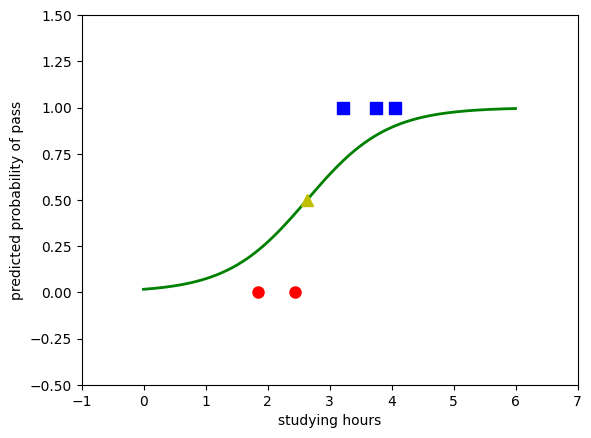

In [14]:
y_predicted = np.array([[1 if yi >= 0.5 else 0 for yi in y_h[0]]])

X0 = x_test[np.where(y_predicted == 0)]
y0 = y_predicted[np.where(y_predicted == 0)]
X1 = x_test[np.where(y_predicted == 1)]
y1 = y_predicted[np.where(y_predicted == 1)]

plt.plot(X0, y0, 'ro', markersize = 8)
plt.plot(X1, y1, 'bs', markersize = 8)

plt.axis([-1, 7, -0.5, 1.5])
plt.plot(xx, yy, 'g-', linewidth = 2)
plt.plot(threshold, .5, 'y^', markersize = 8)
plt.xlabel('studying hours')
plt.ylabel('predicted probability of pass')
plt.show()